# TensorFlow

## Hello World

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(42)

In [9]:
# for making an array with one dimension with a special name we use tf.constannt
a = tf.constant([2], name = 'constant_a')
b = tf.constant([3], name = 'constant_b')

In [10]:
a,b

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([3], dtype=int32)>)

In [11]:
# for evaluating the value for the function we use this formation
a.numpy()[0]

2

In [12]:
# def add is used for adding two array
def add(a,b):
    c = tf.add(a,b)
    return c

In [13]:
result = add(a,b)
tf.print(result[0])

5


Define multidimensional arrays using tensorflow

In [14]:
scalar = tf.constant(2)
vector = tf.constant([1,2,3])
matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
tensor = tf.constant([[[1,2,3],[1,4,7],[2,5,8]],[[3,6,9],[2,5,8],[0,1,4]],[[2,5,8],[3,6,9],[2,5,4]]])

scalar, vector, matrix, tensor

(<tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 <tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=int32)>,
 <tf.Tensor: shape=(3, 3, 3), dtype=int32, numpy=
 array([[[1, 2, 3],
         [1, 4, 7],
         [2, 5, 8]],
 
        [[3, 6, 9],
         [2, 5, 8],
         [0, 1, 4]],
 
        [[2, 5, 8],
         [3, 6, 9],
         [2, 5, 4]]], dtype=int32)>)

In [15]:
scalar.shape, vector.shape, matrix.shape, tensor.shape

(TensorShape([]),
 TensorShape([3]),
 TensorShape([3, 3]),
 TensorShape([3, 3, 3]))

In [16]:
matrix_a = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
matrix_b = tf.constant([[2,2,2],[3,3,3],[7,7,7]])

In [17]:
matrix_a + matrix_b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 3,  4,  5],
       [ 7,  8,  9],
       [14, 15, 16]], dtype=int32)>

In [18]:
add(matrix_a, matrix_b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 3,  4,  5],
       [ 7,  8,  9],
       [14, 15, 16]], dtype=int32)>

In [19]:
# multiplication fo two matrix is like this form
def multiplication(a,b):
    return tf.matmul(a,b)

In [20]:
multiplication(matrix_a, matrix_b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 29,  29,  29],
       [ 65,  65,  65],
       [101, 101, 101]], dtype=int32)>

In [21]:
# and here we have subtract 

a = tf.constant([5])
b = tf.constant([2])
c = tf.add(a,b)
d = tf.subtract(a,b)

c, d

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([7], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([3], dtype=int32)>)

In [22]:
# variables in tensorflow are really important and we can use them in the calculation in this way

v = tf.Variable(0)

def increase_by_two(v):
    return tf.add(v,1)

for i in range(3):
    v = increase_by_two(v)
    print(v)


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


## Eager Execution

`Eager execution` in TensorFlow refers to an imperative programming environment that evaluates operations immediately as they are called. In contrast to the traditional TensorFlow workflow, where you first define a computational graph and then run it within a session, eager execution allows you to execute TensorFlow operations eagerly, much like you would in standard Python code.


Basicly eager execution enables in Tensorflow 2.x and we can evaluate it by the below code

In [23]:
from tensorflow.python.framework.ops import enable_eager_execution
enable_eager_execution()

In [24]:
tf.executing_eagerly()

True

In [25]:
x = [[4]]
m = tf.matmul(x,x)
print(f'The result is {m.numpy()}')

The result is [[16]]


In [26]:
a = tf.constant(np.array([1., 2., 3.]))
b = tf.constant(np.array([4., 5., 6.]))
c = tf.tensordot(a, b, 1) # (`1`) specifies the axes along which the contraction will happen.
print(f'The type of the `a` is {type(c)}, and its value is {c.numpy()}')

The type of the `a` is <class 'tensorflow.python.framework.ops.EagerTensor'>, and its value is 32.0


Here it is clear that why the eager execution is beneficial and we now that all the functionality of the host language is available and we can use in different functions so easily. Lets look at this fizzbuzz example:

In [27]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num%2)==0 and int(num%5)==0:
            print('FizzBuzz')
        elif int(num%5)==0:
            print('Buzz')
        elif int(num%2)==0:
            print('Fizz')
        else:
            print(num.numpy())  
    counter+= 1

In [28]:
fizzbuzz(10)

1
Fizz
3
Fizz
Buzz
Fizz
7
Fizz
9
FizzBuzz


Whereas we can disable eager execution by the below code and here we can see that we are not allow to use the functiones that we have in the host library and we have to make them by ourselves

In [29]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [30]:
tf.executing_eagerly()

False

In [31]:
a = tf.constant(np.array([1., 2., 3.]))
b = tf.constant(np.array([4.,5.,6.]))
c = tf.tensordot(a, b, 1)
print(f'the value of this operation is {c.value_index} and the type of the result is {type(c)}')

the value of this operation is 0 and the type of the result is <class 'tensorflow.python.framework.ops.Tensor'>


So now here is easy to understand that the what s the benefits of the eager execution.

## Linear Regression with TensorFlow

Linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Lets start with a simple example of a linear data which is base on a dataset that we will make it. First of all we define an array of independent variables, then we adjust the slop and intercept and by add a sspecial value of random numbers as noise we try to produce a dataset

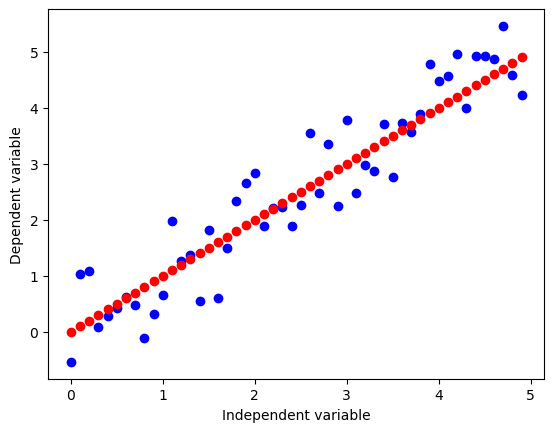

In [33]:
# Defining the independent variable
X = np.arange(0.0, 5.0, 0.1) 
len =X.shape[0]
random.shuffle(X)
# Adjusting the slop
a = 1
# Adjusting the intercept
b = 0
# Defining the dependent variable
Y = a*X + b

lst_rand = []
for i in range(len):
    lst_rand.append(random.random())

Y_N_1 = np.add(Y[0:int(len*.5)],np.array(lst_rand[0:int(len*.5)]))
Y_N_2 = np.add(Y[int(len*.5):int(len)],-np.array(lst_rand[int(len*.5):int(len)]))
Y_N = np.concatenate((Y_N_1,Y_N_2),axis=0)

plt.plot(X,Y_N,'o',c = 'blue')
plt.plot(X,Y, 'o',c = 'red')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

Now we assume that X and Y_N are our dataset and we want to make a Linear model base on them and our target is the red circle line. Here we  define a function for calculating the value of `y` and then we have to initialize slop and intercept. Besides, we use predefined method for calculating the loss function. 

In [41]:
# Lets define the linear function
def h(x):
    y = a*x + b
    return y

# Besides we have to initialize the variables a and b
# here we choose ones like tensors 
a = tf.Variable(tf.ones([1]))
b = tf.Variable(tf.ones([1]))

# A predefined method for calculation the loss function in TensorFlow
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready for train the model

In [42]:
learning_rate = 2

epochs = 200 # epochs are the number of itterating the calculation

train_data = []
loss_values = []
a_values = []
b_values = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:

        Y_P = h(X)
        loss_value = loss_object(Y_N, Y_P)
        loss_values.append(loss_value)

        gradients = tape.gradient(loss_value, [a,b])

        a_values.append(a.numpy())
        b_values.append(b.numpy())

        a.assign_sub(gradients[0]*learning_rate)
        b.assign_sub(gradients[1]*learning_rate)

        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

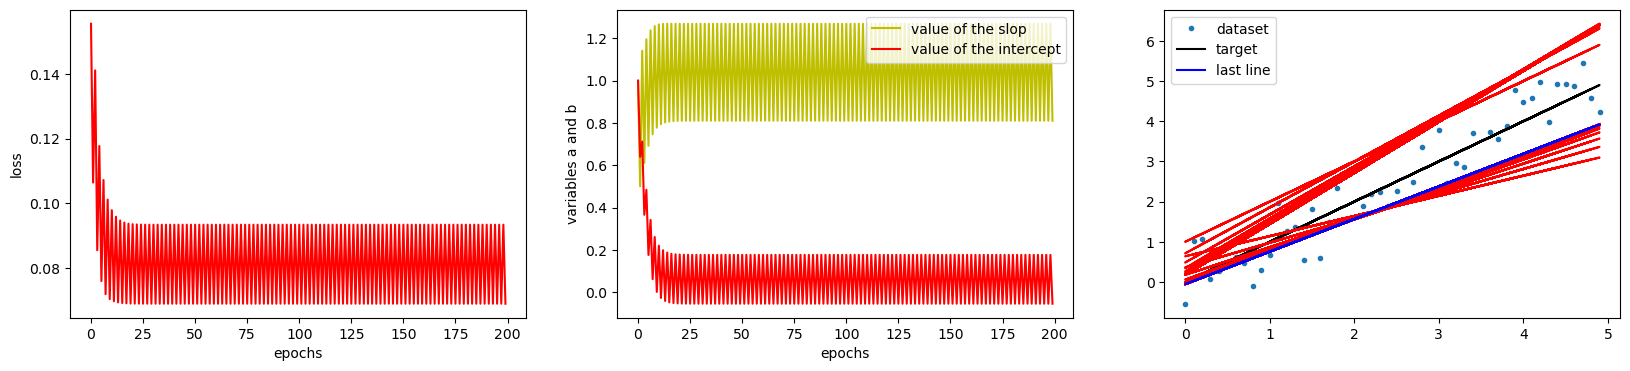

In [43]:
fig, ax = plt.subplots(1, 3, figsize = (20,4)) 
ax[0].plot(loss_values, 'r-')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[1].plot(np.arange(0,epochs), a_values, 'y-',label = 'value of the slop');
ax[1].plot(np.arange(0,epochs), b_values, 'r-',label = 'value of the intercept');
ax[1].legend(loc="upper right")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('variables a and b')
ax[2].plot(X, Y_N,'.',label = 'dataset');
ax[2].plot(X,Y,'black', label = 'target')
for a,b in zip(a_values, b_values):
    ax[2].plot(X, a*X + b ,'r-')
ax[2].plot(X, a_values[-1]*X + b_values[-1] ,'b-' , label = 'last line');
ax[2].legend(loc="upper left");



## Logestic Regression with TensorFlow

### Theoretical Definitions

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <i>y</i>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic <i>regression</i>, it is actually a <b>probabilistic classification</b> model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
P = \theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity $-\infty$) and 1 (as y approaches plus infinity $+\infty$). This now becomes a special kind of non-linear regression.

In this equation, <i>y</i> is the regression result (the sum of the variables weighted by the coefficients), <code>exp</code> is the exponential function and $\theta(y)$ is the logistic function, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modeling population growth.

You might also have seen this function before, in another configuration:

$$
P = \theta(y) = \frac{1}{1+e^{-y}}
$$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid function but then treats the result as a probability.

Now we can clarify the difference between Linear Regression and Logestic Regression.

`1. Purpose:`  
  
-  Linear Regression: It is used for predicting a continuous dependent variable based on one or more independent variables. The relationship between the variables is assumed to be linear.  
  
-  Logistic Regression: It is used for predicting the probability of an event happening or not happening. The dependent variable is binary (e.g., 0 or 1, true or false), representing the occurrence or non-occurrence of an event.

`2. Dependent Variable:`  
  
-  Linear Regression: The dependent variable is continuous and can take any real value within a range.  
  
-  Logistic Regression: The dependent variable is binary and represents the probability of an event occurring.  

`3. Output:`  
  
-  Linear Regression: The output is a continuous value. The model predicts a quantity.  
  
-  Logistic Regression: The output is transformed using the logistic function (sigmoid function) to produce a probability value between 0 and 1. This can be interpreted as the probability of the event occurring.

`4. Model Type:`  
  
-  Linear Regression: It is a regression model used for predicting a continuous outcome.  
  
-  Logistic Regression: It is a classification model used for predicting the probability of belonging to a particular class.

Lets describe Logestic Regression by an example and first of all we import modules that we need for this example:

In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### IRIS Example

#### Set Dataset

Let's start with a dataset as a starting point

In [56]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

trainX = tf.constant(trainX, dtype = 'float32')
trainY = tf.constant(trainY, dtype = 'float32')
testX = tf.constant(testX, dtype = 'float32')
testX = tf.constant(testX, dtype = 'float32')

numFeature = trainX.shape[1]
numLabels = trainY.shape[1]

#### Set model weights and bias

The next step is to set the weights and bias of the model. This step is so similar to the Linear Regression, we just need a shared variable weight matrix for Logistic Regression. We initialize both $W$ and $b$ as tensors full of zeros. Since we are going to learn $W$ and $b$, their initial value does not matter too much. These variables are the objects which define the structure of our regression model, and we can save them after they have been trained so we can reuse them later.

We define two TensorFlow variables as our parameters. These variables will hold the weights and biases of our logistic regression and they will be continually updated during training. 

Notice that $W$ has a shape of [4, 3] because we wanna multiply the 4-dimensional input vectors by it to produce 3-dimensional vectors of evidence for the difference classes.$b$ has a shape of [3] so we can add it to the output. TensorFlow variables need to be initialized with values, e.g. with zeros.

In [48]:
W = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

or we can define it in this way which is more reliable than last zeros_like

In [54]:
weights = tf.Variable(tf.random.normal([numFeature, numLabels], 
                                       mean=0,
                                       stddev=0.01,
                                       name='weights'),
                                       dtype='float32')

bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name='bias'))

#### Set model

We now define our model in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

$$
y =sigmoid(WX+b)
$$

However, for the sake of clarity, we can have it broken into its three main components: 

-   a weight times features matrix multiplication operation, 
-   a summation of the weighted features and a bias term, 
-   and finally the application of a sigmoid function. 

As such, you will find these components defined as three separate operations below.

In [86]:
def logistic_regression_model(x,w,b):

    apply_weights = tf.matmul(x, w, name = 'apply_weight')
    add_bias = tf.add(apply_weights, b, name = 'add_bias')
    activation=tf.nn.sigmoid(add_bias, name='activation')

    return activation

#### Training The model

The learning algorithm is how we search for the best weight vector $W$ and best bias $b$. This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure. Here the questuion is, what tells us that our model is bad? and the answere is,the Cost or Loss of the model, so what we want is to minimize that. The cost function we are going to utilize is the Squared Mean Error loss function.  
  
Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate. Here the number of iteration appear by Epochs and the formation of the learning rate is exponentially which means that overally the learning rate starts at a point and decreases exponentially over time. The decay occurs at regular intervals defined by decay_steps, and the rate of decay is controlled by the decay_rate parameter.


In [63]:
Epochs = 100

learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                                               decay_steps = trainX.shape[0],
                                                               decay_rate = 0.95,
                                                               staircase = True)

loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learning_rate)

We also want some additional operations to keep track of the model's efficiency over time. We can do this like so:

In [85]:
def accuracy(y_pred, y_true):

    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [93]:
def run_optimization(x, y, w, b):
    with tf.GradientTape() as tape:
    # Forward Pass
        pred = logistic_regression_model(x, w, b)
        loss = loss_object(pred, y)
    # Backward Pass
    gradients = tape.gradient(loss, [w, b])
    # Optimization Step:
    optimizer.apply_gradients(zip(gradients, [w, b]))